In [1]:
import scvelo as scv

In [2]:
diff = scv.read('Differentiated/velocyto/Differentiated.loom')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
reg = scv.read('Regular/velocyto/Regular.loom')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
import pandas as pd
meta = pd.read_table('RD_Larry_metadata.xls')

In [5]:
cellnames = list(map(lambda x: (':'.join(x)).split('_')[0]+'x', list(zip(meta.loc[:, 'orig.ident'], meta.index))))

In [6]:
umap = pd.read_table('RD_Larry_umap.xls')

In [7]:
meta.index = cellnames
umap.index = cellnames

In [8]:
reg_cells = reg.obs_names[reg.obs_names.isin(meta.index)]

In [9]:
diff_cells = diff.obs_names[diff.obs_names.isin(meta.index)]

In [10]:
diff = diff[diff_cells, :]
diff.obsm['X_umap'] = umap.loc[diff.obs_names, :].values
diff.obs['cellstate'] = meta.loc[diff.obs_names, 'seurat_clusters'].values

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [11]:
reg = reg[reg_cells, :]
reg.obsm['X_umap'] = umap.loc[reg.obs_names, :].values
reg.obs['cellstate'] = meta.loc[reg.obs_names, 'seurat_clusters'].values

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [12]:
scv.pp.filter_and_normalize(diff, min_shared_counts=20, n_top_genes=1000)
scv.pp.moments(diff, n_pcs=50, n_neighbors=50)
scv.tl.recover_dynamics(diff, n_jobs=24)
scv.tl.velocity(diff, mode='dynamical')
scv.tl.latent_time(diff)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 23108 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 1000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:13) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 24/44 cores)


  0%|          | 0/648 [00:00<?, ?gene/s]

    finished (0:00:35) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 2 regions of root cells and 1 region of end points .
    finished (0:00:01) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


In [13]:
scv.pp.filter_and_normalize(reg, min_shared_counts=20, n_top_genes=1000)
scv.pp.moments(reg, n_pcs=50, n_neighbors=50)
scv.tl.recover_dynamics(reg, n_jobs=24)
scv.tl.velocity(reg, mode='dynamical')
scv.tl.latent_time(reg)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 22635 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 1000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 24/44 cores)


  0%|          | 0/737 [00:00<?, ?gene/s]

    finished (0:00:34) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


In [14]:
color_dict = {
    'Ground':  '#773E14',
    'Hypoxia': "#EC8528",
    'UPR':  '#F1FA64',
    'EMT':  '#3B1673',
    'Prolif': '#1440D8',
    'Muscle': '#E12727',
    'Histone': '#E24B8F',
    'Apoptosis': '#9E3CC8', 
    'Interferon': '#489F4B',
    'Unique#6': 'gray',
    'Unique#7': 'gray',
    'Unique#8': 'gray',
    'Unique #5': 'gray',
    'Unique #1': 'gray',
    'Unique #2': 'gray',
    'Unique #3': 'gray',
    'Unique #4': 'gray',
    'Unique #2_4': 'gray',
    'Unique #2_4_6': 'gray',
    'Unique #3_5_Muscle': 'gray',
    'Neural': '#00FFFD'
}

In [15]:
diff.obs.loc[:, 'clusters'] = diff.obs.loc[:, 'cellstate']
diff.uns['clusters_colors'] = [color_dict[c] for c in diff.obs['clusters'].cat.categories]

In [16]:
reg.obs.loc[:, 'clusters'] = reg.obs.loc[:, 'cellstate']
reg.uns['clusters_colors'] = [color_dict[c] for c in reg.obs['clusters'].cat.categories]

<AxesSubplot:title={'center':'Differentiated'}>

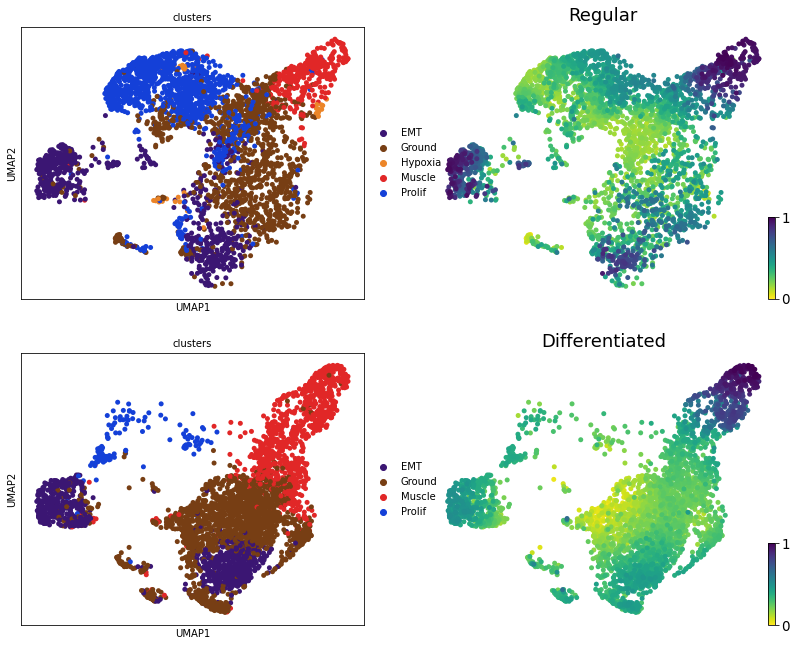

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2)

fig.set_size_inches(13.5, 11)

# scv.pl.velocity_embedding_grid(reg, scale=0.1, color='clusters', ax=ax[0][0], show=False,
#                                legend_loc='right margin',
#                                arrow_color='black', arrow_size=1.5,
#                                autoscale=False)
scv.pl.umap(reg, color='clusters', ax=ax[0][0], show=False,
            legend_loc='right margin', s=100, frameon=True)
scv.pl.scatter(reg, basis='umap', color=['latent_time'], title='Regular',
               size=100, legend_fontsize=18, fontsize=18,        
               vmin=0, vmax=1.0, s=100,
               show=False, ax=ax[0][1])

# scv.pl.velocity_embedding_grid(diff, scale=0.1, color='clusters', ax=ax[1][0], show=False,
#                                legend_loc='right margin',
#                                arrow_color='black', arrow_size=1.5,
#                                autoscale=False)

scv.pl.umap(diff, color='clusters', ax=ax[1][0], show=False, s=100,
            legend_loc='right margin', frameon=True)

scv.pl.scatter(diff, basis='umap', color=['latent_time'], title='Differentiated',
               size=100, legend_fontsize=18, fontsize=18,        
               vmin=0, vmax=1.0, s=100,
               show=False, ax=ax[1][1])

In [29]:
fig.savefig("Larry_velocity_analysis.pdf")

In [55]:
%pwd

'/data/langenau/alvin_singlecell/larry/claudia'